In [1]:
from matplotlib.projections import register_projection
import matplotlib.pyplot as plt
import pandas as pd

from visualization import RadarChart, RadarAxes

In [2]:
# Data for cmAP
data_cmAP = {
    'PER': [0.30, 0.21, 0.18],
    'NES': [0.38, 0.35, 0.39],
    'UHH': [0.31, 0.25, 0.27],
    'HSN': [0.54, 0.49, 0.45],
    'NBP': [0.68, 0.66, 0.63],
    'SSW': [0.42, 0.38, 0.28],
    'SNE': [0.33, 0.31, 0.29]
}
df_cmAP = pd.DataFrame(data_cmAP, index=['AudioProtoPNet-5', 'ConvNeXt', 'Perch'])

In [3]:
# Data for AUROC
data_AUROC = {
    'PER': [0.79, 0.73, 0.70],
    'NES': [0.93, 0.89, 0.90],
    'UHH': [0.87, 0.72, 0.76],
    'HSN': [0.92, 0.88, 0.86],
    'NBP': [0.93, 0.92, 0.91],
    'SSW': [0.97, 0.93, 0.91],
    'SNE': [0.86, 0.83, 0.83]
}
df_AUROC = pd.DataFrame(data_AUROC, index=['AudioProtoPNet-5', 'ConvNeXt', 'Perch'])

In [4]:
# Data for T1-Acc
data_T1_Acc = {
    'PER': [0.59, 0.43, 0.48],
    'NES': [0.52, 0.49, 0.66],
    'UHH': [0.49, 0.43, 0.57],
    'HSN': [0.65, 0.60, 0.58],
    'NBP': [0.71, 0.69, 0.69],
    'SSW': [0.66, 0.58, 0.62],
    'SNE': [0.74, 0.69, 0.69]
}
df_T1_Acc = pd.DataFrame(data_T1_Acc, index=['AudioProtoPNet-5', 'ConvNeXt', 'Perch'])

In [5]:
legend_bbox_to_anchor  = (1.8, 0.75)
figure_size = (25,10)
frame = "polygon"
num_vars = len(df_cmAP.columns)
grid_label_fontsize = 24
label_fontsize = 26
legend_font_size = 28
title_pad = 32
legend_handle_length = 1.8

label_positions = [
    (0., -0.02),
    (0., -0.09),
    (0., -0.12),
    (0., -0.07),
    (0., -0.07),
    (0., -0.12),
    (0., -0.09),
]

colors = [
    "red",
    "blue",
    "green",
    #"#DC143C",  # Crimson
    # #"#FFA500",  # Orange
    #"#4169E1",  # Royal Blue
    #"#32CD32",  # Lime Green
    #"#BA55D3",  # Medium Orchid
    #"#00CED1",  # Cyan
        ]

line_styles = [
    "-",
   "--",
   #"-.",
   ":",
    #(0, (3, 1, 1, 1)),
    #(0, (5, 10))
]

legend_labels = list(df_cmAP.index)
custom_handles = [
                plt.Line2D([0], [0], color=color, lw=2, linestyle=ls)
                for color, ls in zip(
                    colors[: len(legend_labels)], line_styles[: len(legend_labels)]
                )
            ]

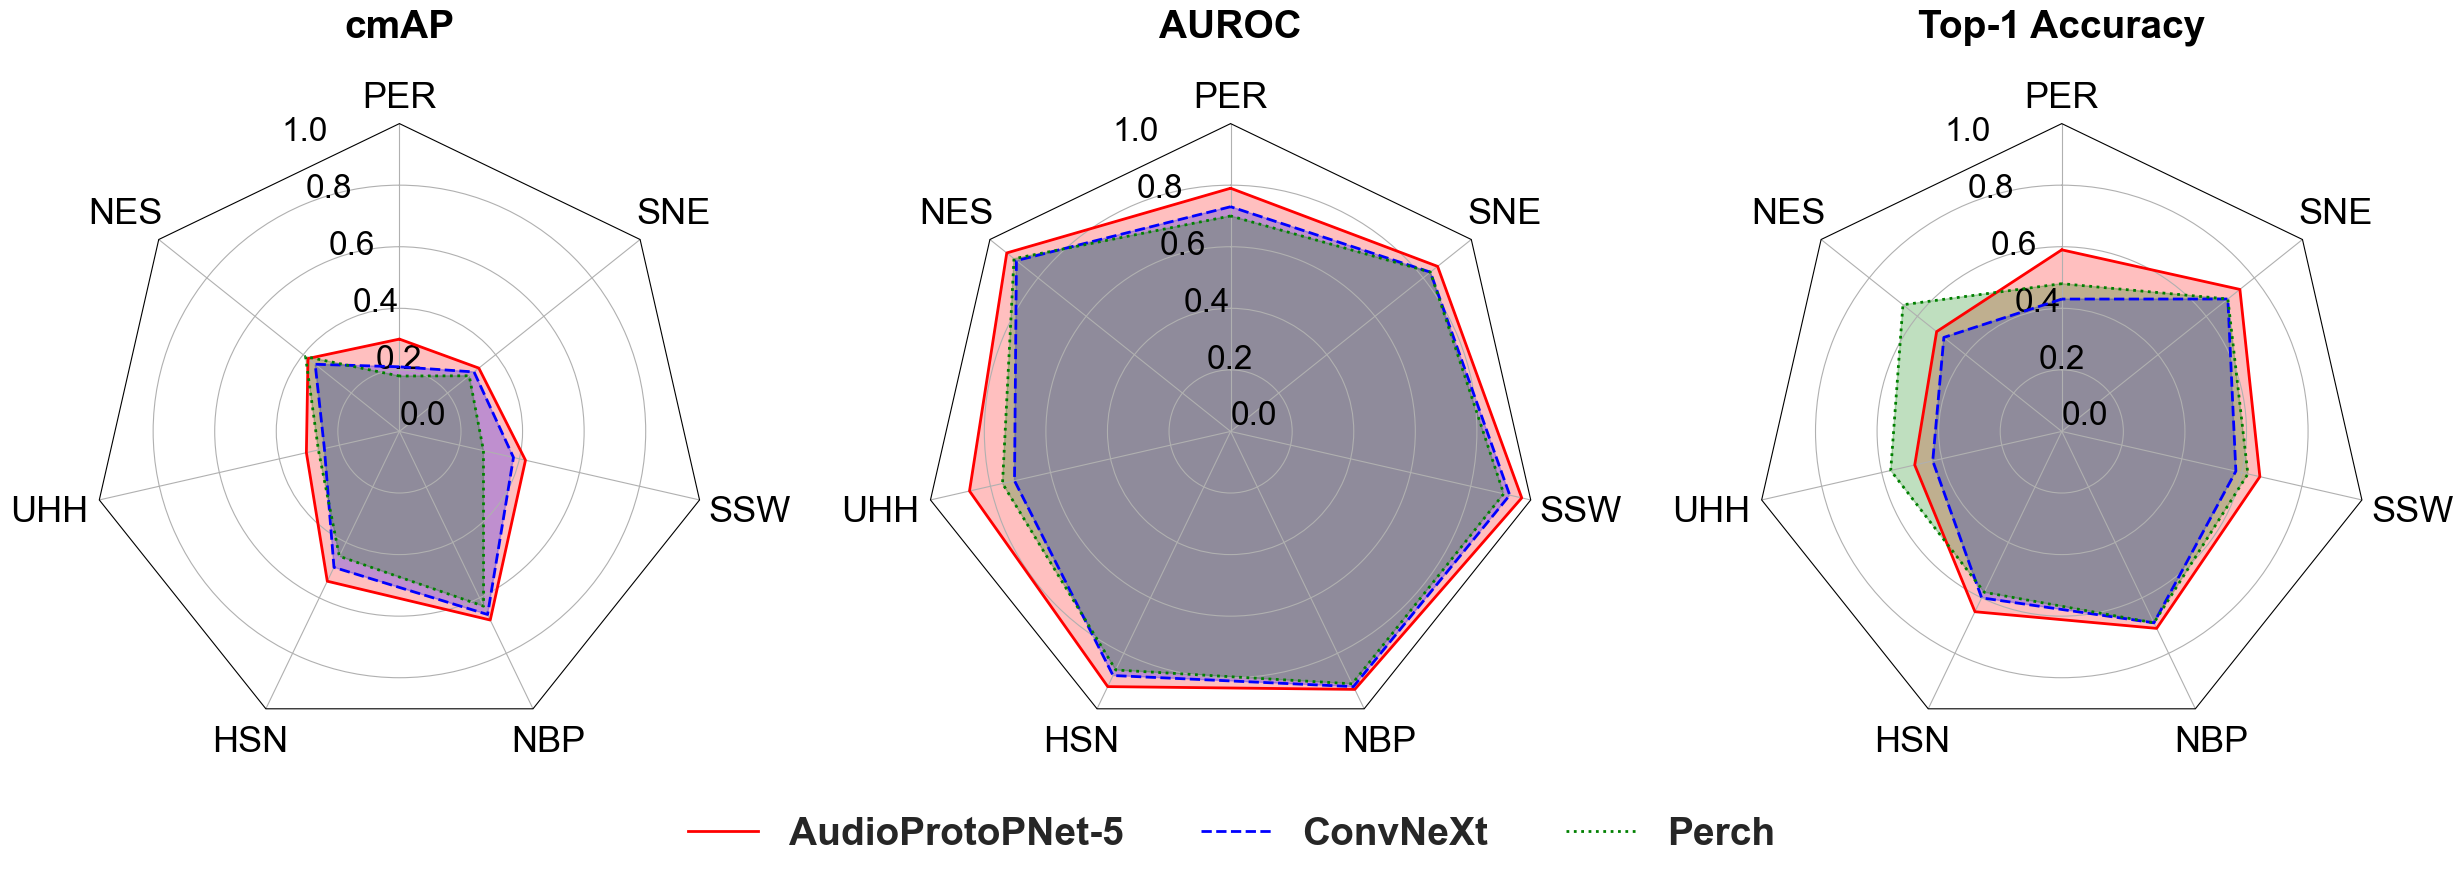

In [6]:
# Register the custom projection
register_projection(RadarAxes)

# Create the figure and axes
fig, axes = plt.subplots(1, 3, figsize=figure_size, subplot_kw=dict(projection="radar", frame=frame, num_vars=num_vars))

# Plot each radar chart in its own subplot
radar_chart_cmAP = RadarChart(num_vars=num_vars, frame=frame, label_positions=label_positions)
radar_chart_cmAP.plot(data=df_cmAP, ax=axes[0], include_legend=False, colors=colors, line_styles=line_styles, grid_label_fontsize=grid_label_fontsize, label_fontsize=label_fontsize, legend_fontsize=legend_font_size, plot_title='cmAP', title_pad=title_pad)

radar_chart_AUROC = RadarChart(num_vars=num_vars, frame=frame, label_positions=label_positions)
radar_chart_AUROC.plot(data=df_AUROC, ax=axes[1], include_legend=False, colors=colors, line_styles=line_styles, grid_label_fontsize=grid_label_fontsize, label_fontsize=label_fontsize, legend_fontsize=legend_font_size, plot_title='AUROC', title_pad=title_pad)

radar_chart_T1_Acc = RadarChart(num_vars=num_vars, frame=frame, label_positions=label_positions, legend_bbox_to_anchor=legend_bbox_to_anchor)
radar_chart_T1_Acc.plot(data=df_T1_Acc, ax=axes[2], include_legend=False, legend_fontsize=legend_font_size, colors=colors, line_styles=line_styles, grid_label_fontsize=grid_label_fontsize, label_fontsize=label_fontsize, plot_title='Top-1 Accuracy', title_pad=title_pad)

# Create a figure-level legend
fig.legend(handles=custom_handles, labels=legend_labels, loc='upper center', bbox_to_anchor=(0.5, 0.15), ncol=3, prop={'size': legend_font_size, 'weight': 'bold'}, handlelength=legend_handle_length,)


# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.35)  # Increase wspace to increase the distance between charts

plt.show()

In [7]:
# Save the figures if needed
# Save the entire figure as a PDF
fig.savefig("radar_charts.pdf", format='pdf')